# MNIST Practice 1.

In [ ]:
# 1 Imports
import torch
from torchvision import datasets 
from torchvision import transforms as transform
from torch.utils.data import DataLoader
from matplotlib import pylab as plt
import torch.nn as nn

import tqdm
import numpy as np
import mitdeeplearning as mdl


In [17]:
# 2 Download data

traindataset = datasets.MNIST (root = './data',train=True, download= True )
testdataset = datasets.MNIST(root ='./data' , train = False, download = True)

100%|██████████| 9.91M/9.91M [00:33<00:00, 295kB/s] 
100%|██████████| 28.9k/28.9k [00:00<00:00, 81.7kB/s]
100%|██████████| 1.65M/1.65M [00:07<00:00, 227kB/s]
100%|██████████| 4.54k/4.54k [00:00<?, ?B/s]


In [30]:
# 3A Display sample image shape
transforms = transform.Compose([transform.ToTensor(),])

image, label = traindataset[0]
print(f"Shape of image {image.size} , Label : {label} ")

Shape of image (28, 28) , Label : 5 


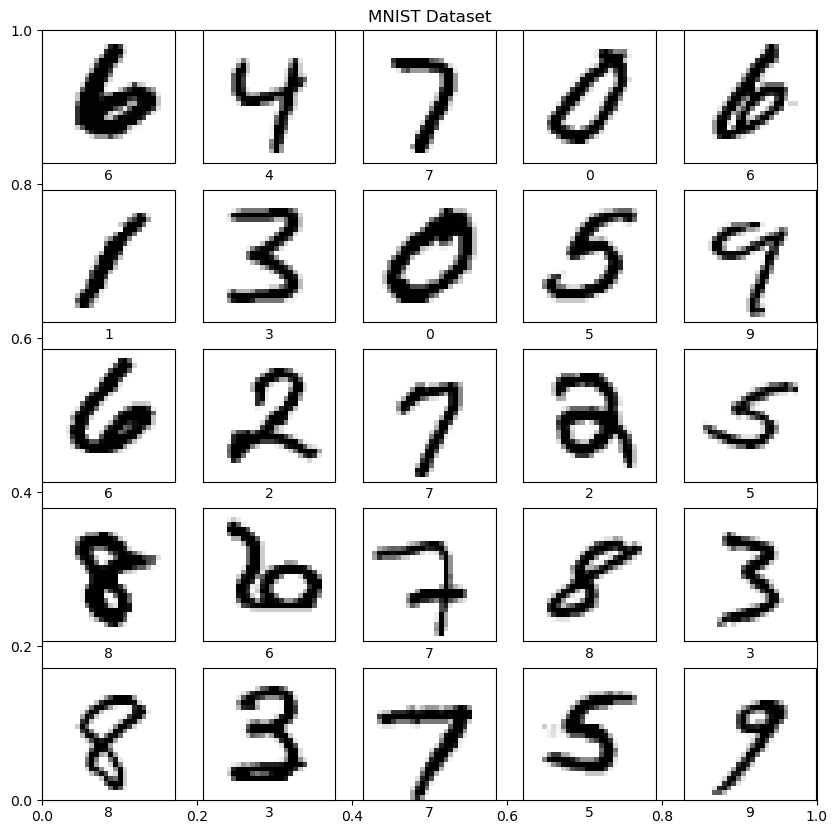

In [38]:
# 3B Display sample image with traindataset
plt.figure(figsize = (10,10))
plt.title('MNIST Dataset')

random_indx = np.random.choice(6000,25)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    indx = random_indx[i]
    image,label = traindataset[indx]
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(label)
plt.show()
    





In [46]:
#4  CNN Class
class CNN(nn.Module):
    def __init__(self):
        super(). __init__()
        self.conv1 = torch.nn.Conv2d(1,32,kernel_size=3)
        self.max1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(32,64,kernel_size=3)
        self.max2 = nn.MaxPool2d(2)

        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64*5*5,128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128,10)

    def forward(self,x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.max1(x)

        x = self.conv2(x)
        x = self.relu(x)
        x = self.max2(x)

        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)

        return x






        

In [ ]:
# 5 Institate CNN Class with sample data for checking
cnn_model = CNN().to('cuda') # Run on GPU
image, label = traindataset[0]
image = image.to('cuda').unsqueeze(0)
label = label.to('cuda')
cnn_model(image)
print(cnn_model)

AttributeError: 'Image' object has no attribute 'unsqueeze'

In [ ]:
# 6 Set Training Parameters
batch_size =64
epochs = 2
learning_rate = 1e-2

# checking tqdm object if any
if hasattr ('.__instances'):
    tqdm.instances.clear()

train_loader = Dataset.MNIST()

In [ ]:
# 7 Training Loop

In [ ]:
# 8 Test Prediction